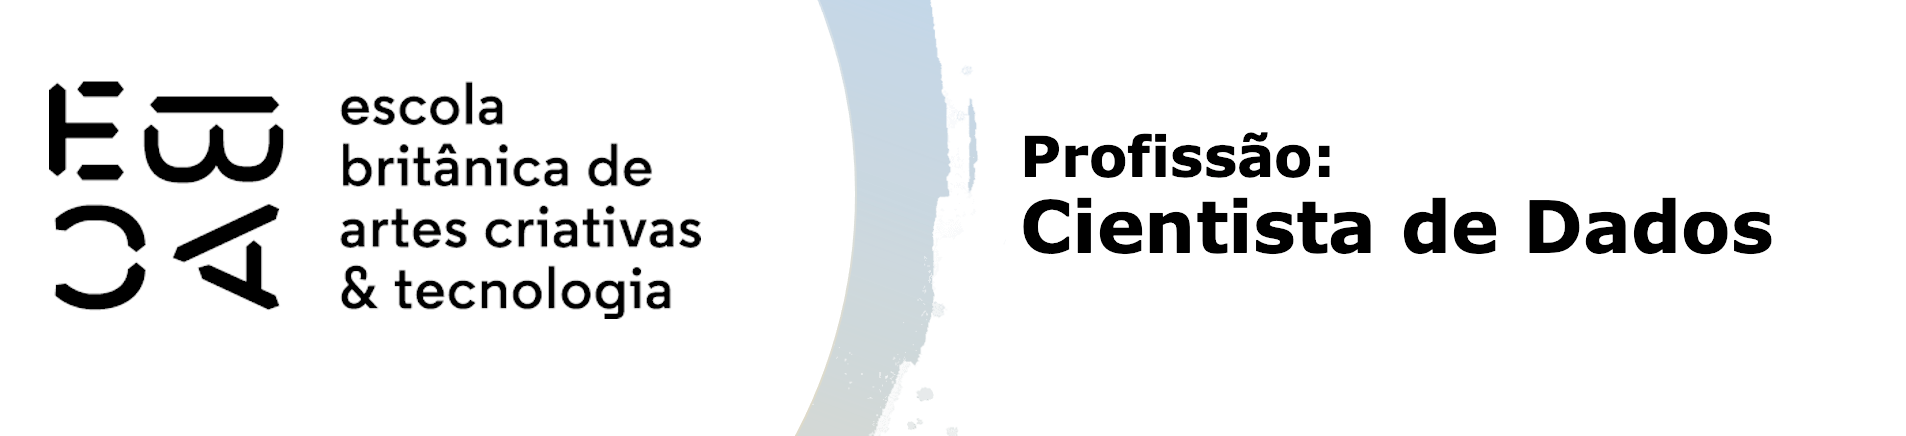

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
# carregando dataset
peng = sns.load_dataset('penguins')
peng.index.name='id'

# Selecionar variáveis numéricas e remover valores ausentes
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
peng_num = peng[features].dropna()




C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

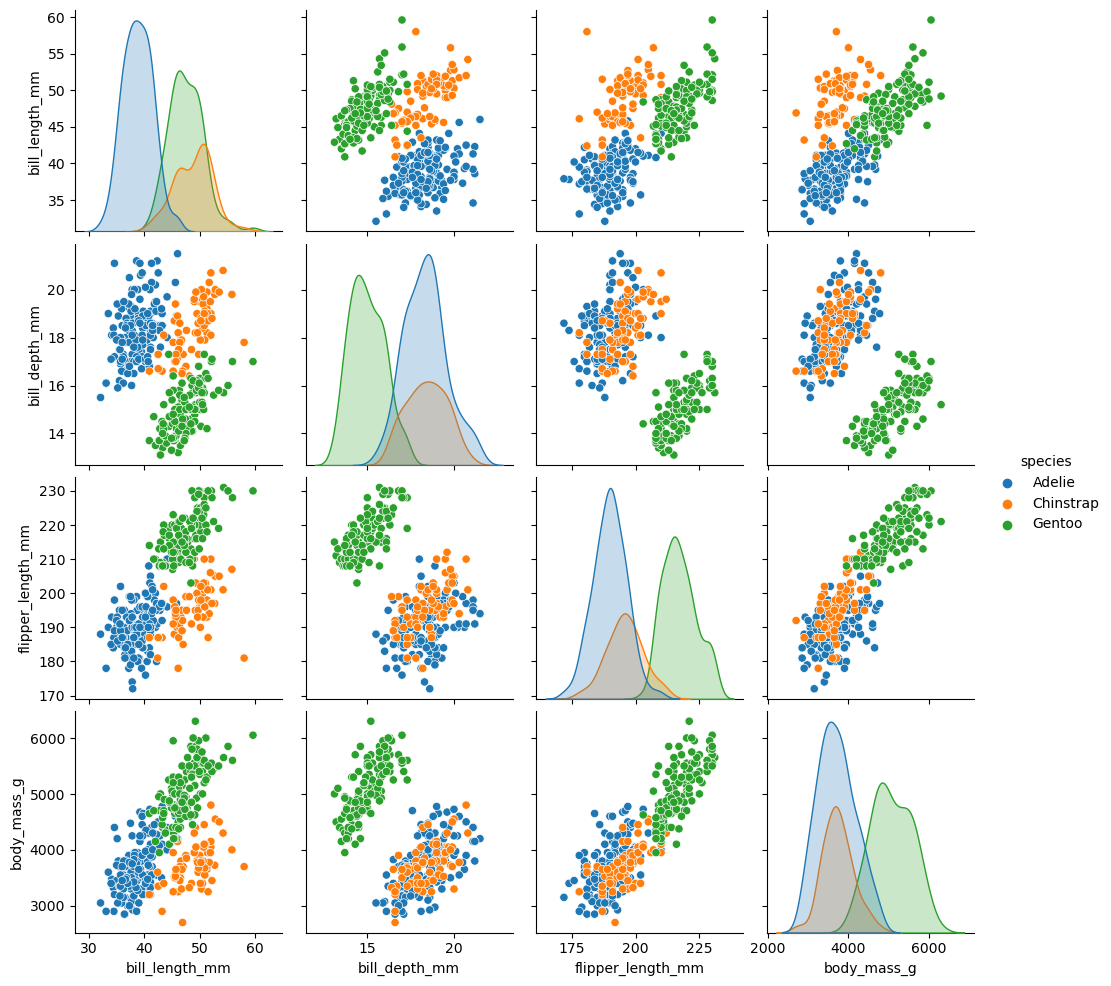

In [3]:

sns.pairplot(data=peng, hue='species')




In [4]:
# Padronizar as variáveis numéricas

scaler = StandardScaler()
X_scaled = scaler.fit_transform(peng_num)


# Aplicar agrupamento hierárquico com 6 grupos
clus = AgglomerativeClustering(n_clusters=6, linkage='complete')
grupo_labels = clus.fit_predict(X_scaled)


# Adicionar grupos ao DataFrame original
peng_agrupado = peng.loc[peng_num.index].copy()
peng_agrupado['grupo'] = grupo_labels

# Contagem de pinguins por grupo e espécie
print("Contagem de espécies por grupo:")
print(peng_agrupado.groupby(['grupo', 'species']).size().unstack(fill_value=0))

# Contagem de pinguins por grupo, espécie e sexo
print("\nContagem de espécies e sexo por grupo:")
print(peng_agrupado.groupby(['grupo', 'species', 'sex']).size().unstack(fill_value=0))

# Estatísticas descritivas das variáveis numéricas por grupo
print("\nEstatísticas descritivas por grupo:")
estatisticas_por_grupo = peng_agrupado.groupby('grupo')[features].describe().transpose()
print(estatisticas_por_grupo)


Contagem de espécies por grupo:
species  Adelie  Chinstrap  Gentoo
grupo                             
0             0          0      71
1            91          5       0
2            60          9       0
3             0          0      52
4             0         42       0
5             0         12       0

Contagem de espécies e sexo por grupo:
sex              Female  Male
grupo species                
0     Gentoo          9    61
1     Adelie         69    18
      Chinstrap       5     0
2     Adelie          4    55
      Chinstrap       9     0
3     Gentoo         49     0
4     Chinstrap      20    22
5     Chinstrap       0    12

Estatísticas descritivas por grupo:
grupo                              0            1            2            3  \
bill_length_mm    count    71.000000    96.000000    69.000000    52.000000   
                  mean     49.192958    37.956250    41.128986    45.200000   
                  std       2.679303     2.321425     3.048872     1.86642

C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

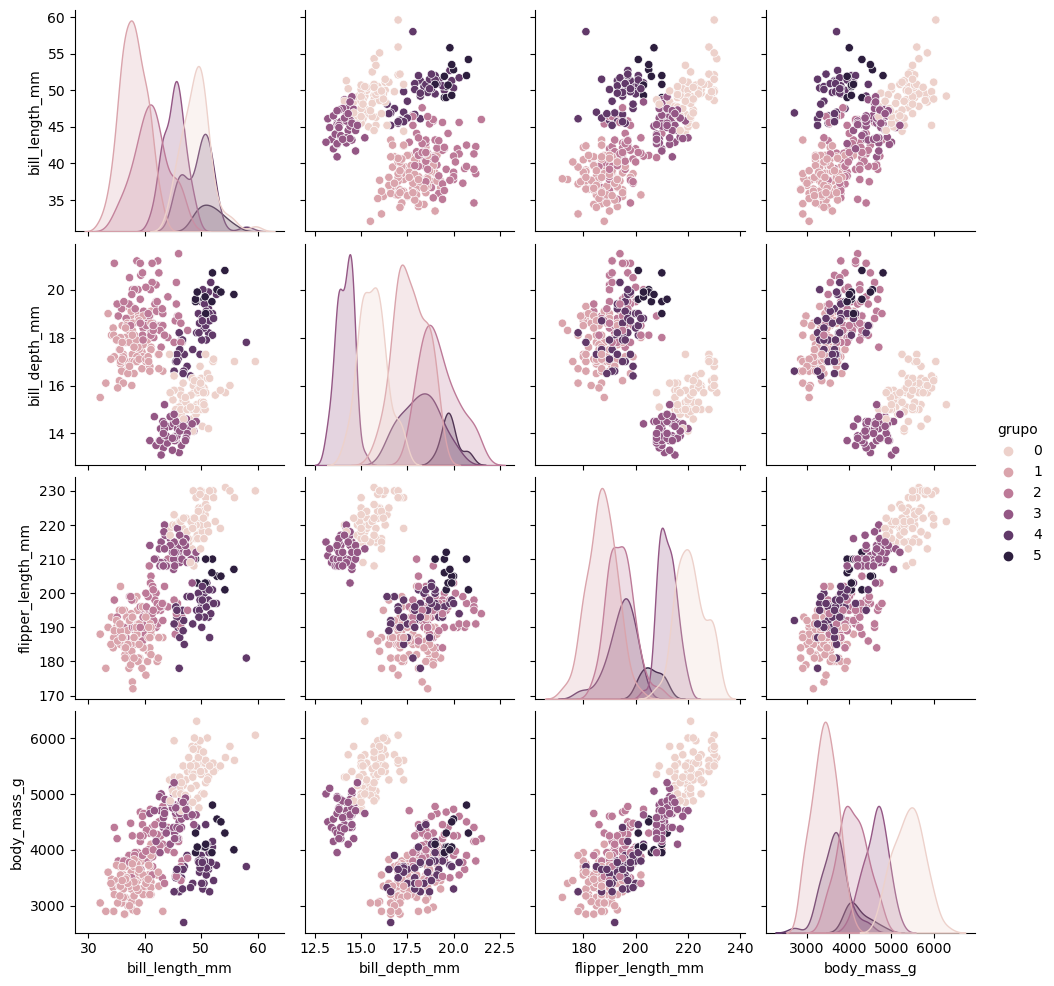

In [5]:


sns.pairplot(data=peng_agrupado.dropna(subset=['grupo']), hue='grupo')



In [6]:

pd.crosstab(peng_agrupado['species'], peng_agrupado['grupo'])


grupo,0,1,2,3,4,5
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [7]:
# piguins em cada grupo

contagem_especies_por_grupo = peng_agrupado.groupby(['grupo', 'species']).size().unstack(fill_value=0)
print(contagem_especies_por_grupo)


species  Adelie  Chinstrap  Gentoo
grupo                             
0             0          0      71
1            91          5       0
2            60          9       0
3             0          0      52
4             0         42       0
5             0         12       0


In [8]:
# variáveis quantitativas
variaveis_quantitativas = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calcular estatísticas descritivas por grupo
estatisticas_por_grupo = peng_agrupado.groupby('grupo')[variaveis_quantitativas].describe().transpose()

# Exibir as estatísticas
print(estatisticas_por_grupo)


grupo                              0            1            2            3  \
bill_length_mm    count    71.000000    96.000000    69.000000    52.000000   
                  mean     49.192958    37.956250    41.128986    45.200000   
                  std       2.679303     2.321425     3.048872     1.866422   
                  min      44.400000    32.100000    34.600000    40.900000   
                  25%      47.400000    36.200000    39.200000    43.575000   
                  50%      49.200000    37.800000    41.100000    45.300000   
                  75%      50.450000    39.600000    42.900000    46.500000   
                  max      59.600000    43.200000    47.600000    49.100000   
bill_depth_mm     count    71.000000    96.000000    69.000000    52.000000   
                  mean     15.625352    17.657292    19.204348    14.103846   
                  std       0.733430     0.872473     0.991943     0.449820   
                  min      14.100000    15.500000   

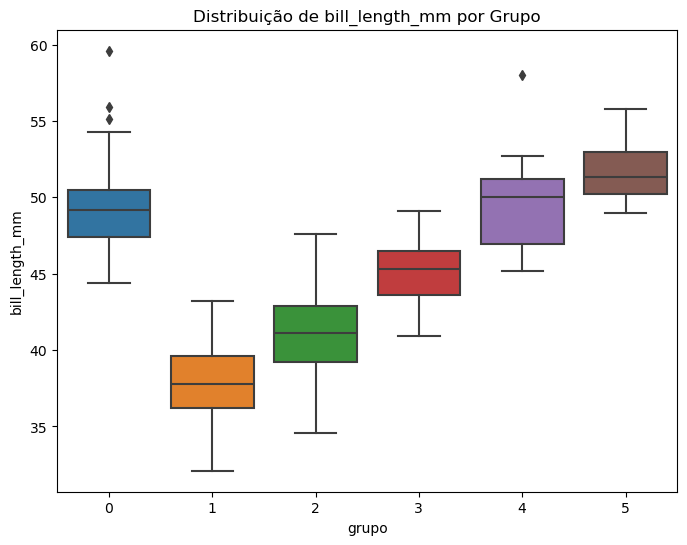

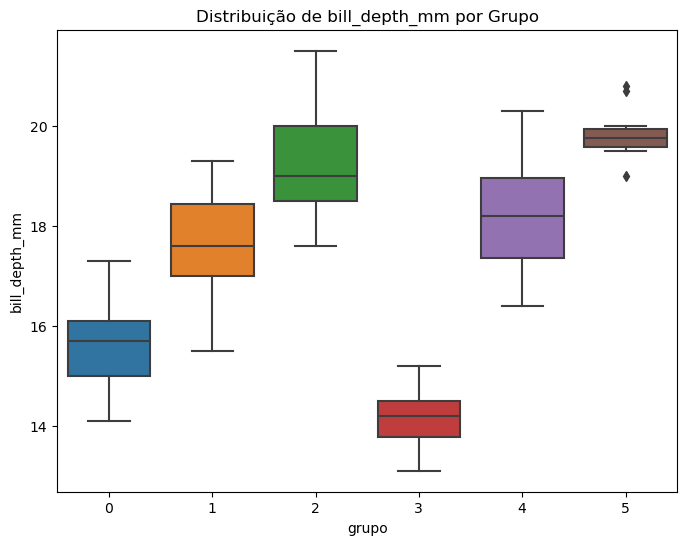

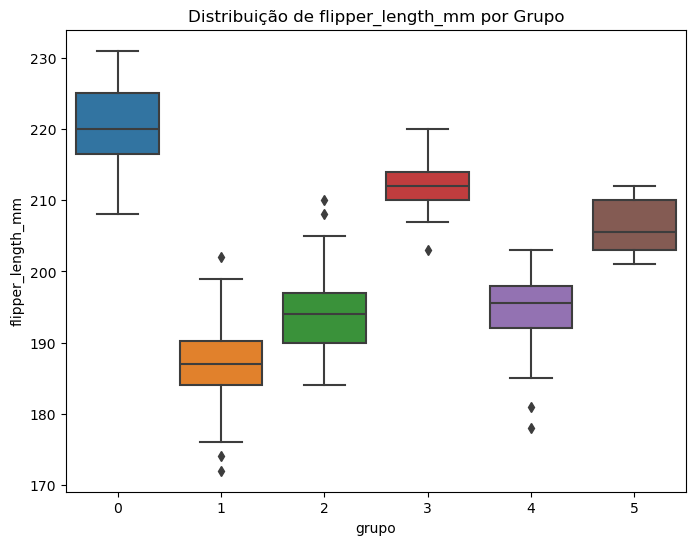

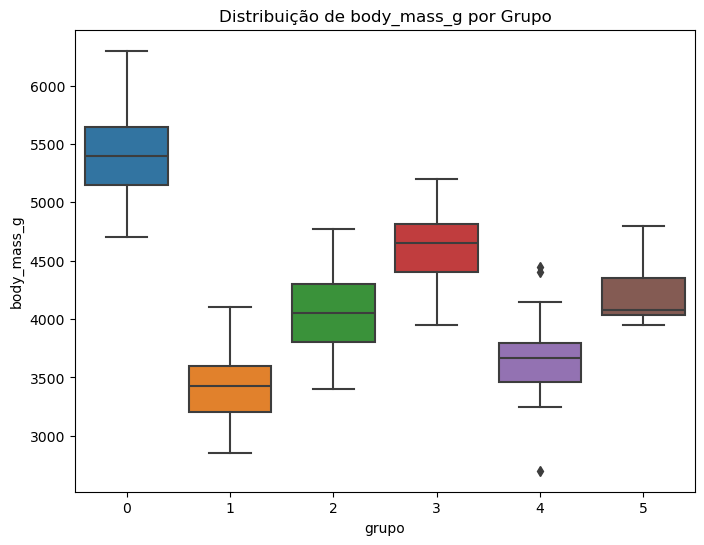

In [9]:
# boxplot

for var in variaveis_quantitativas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='grupo', y=var, data=peng_agrupado)  # Usando peng_agrupado
    plt.title(f'Distribuição de {var} por Grupo')
    plt.show()


## 3) Alterando o agrupamento

O Dendrogarma sugere que podem em haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

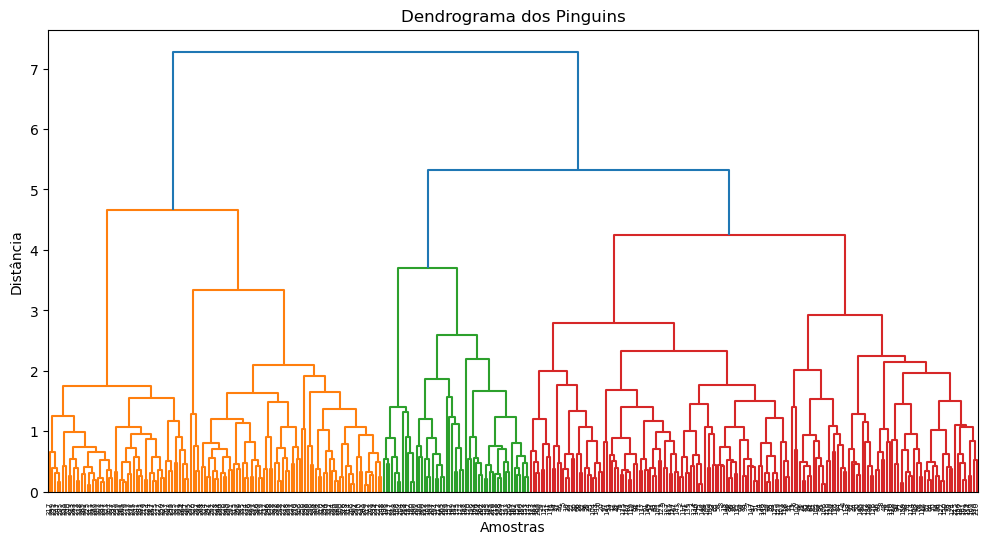

In [10]:
# Plotar o dendrograma
plt.figure(figsize=(12, 6))
plt.title("Dendrograma dos Pinguins")
dend = shc.dendrogram(shc.linkage(X_scaled, method='complete'))
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()


In [13]:
# Aplicar agrupamento com 4 grupos
clus4 = AgglomerativeClustering(n_clusters=4, linkage='complete')
grupo_labels4 = clus4.fit_predict(X_scaled)

# Atualizar DataFrame com novos grupos
peng_agrupado4 = peng.loc[peng_num.index].copy()
peng_agrupado4['grupo'] = grupo_labels4

print("Contagem de espécies por grupo (4 grupos):")
print(peng_agrupado4.groupby(['grupo', 'species']).size().unstack(fill_value=0))



Contagem de espécies por grupo (4 grupos):
species  Adelie  Chinstrap  Gentoo
grupo                             
0           151         14       0
1             0          0      71
2             0         54       0
3             0          0      52


In [14]:
print("\nContagem por grupo, espécie e sexo:")
print(peng_agrupado4.groupby(['grupo', 'species', 'sex']).size().unstack(fill_value=0))



Contagem por grupo, espécie e sexo:
sex              Female  Male
grupo species                
0     Adelie         73    73
      Chinstrap      14     0
1     Gentoo          9    61
2     Chinstrap      20    34
3     Gentoo         49     0


In [15]:
estatisticas_por_grupo_4 = peng_agrupado4.groupby('grupo')[features].describe().transpose()
print("\nEstatísticas descritivas (4 grupos):")
print(estatisticas_por_grupo_4)



Estatísticas descritivas (4 grupos):
grupo                              0            1            2            3
bill_length_mm    count   165.000000    71.000000    54.000000    52.000000
                  mean     39.283030    49.192958    49.935185    45.200000
                  std       3.072471     2.679303     2.659916     1.866422
                  min      32.100000    44.400000    45.200000    40.900000
                  25%      37.000000    47.400000    48.200000    43.575000
                  50%      39.100000    49.200000    50.250000    45.300000
                  75%      41.100000    50.450000    51.375000    46.500000
                  max      47.600000    59.600000    58.000000    49.100000
bill_depth_mm     count   165.000000    71.000000    54.000000    52.000000
                  mean     18.304242    15.625352    18.568519    14.103846
                  std       1.197831     0.733430     1.153473     0.449820
                  min      15.500000    14.100000 

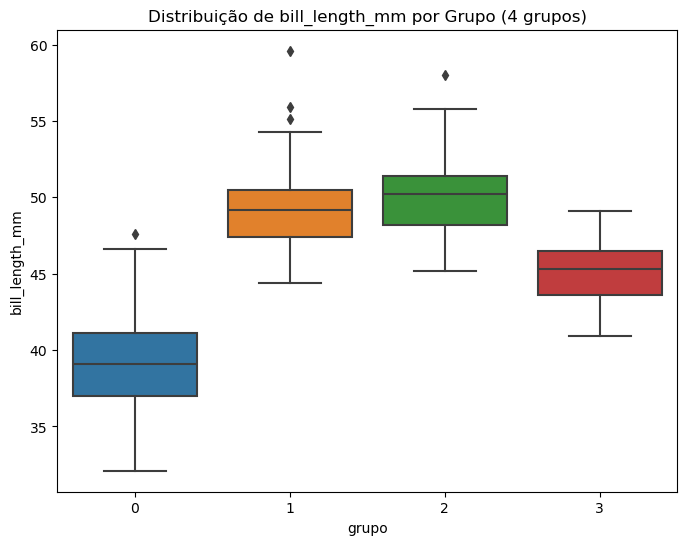

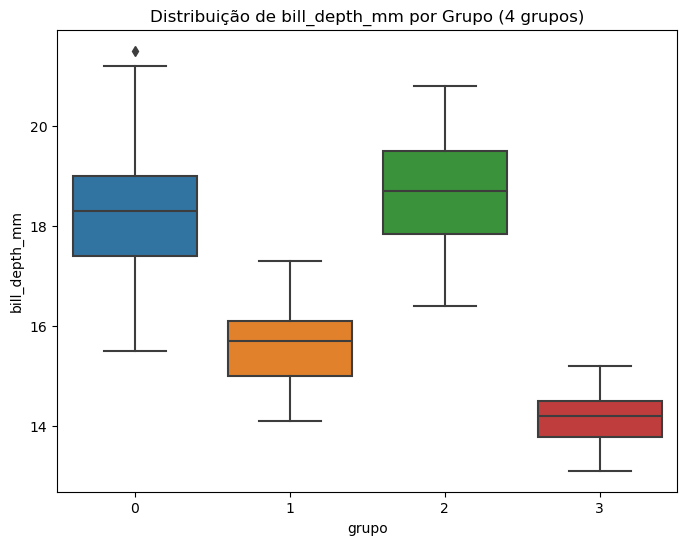

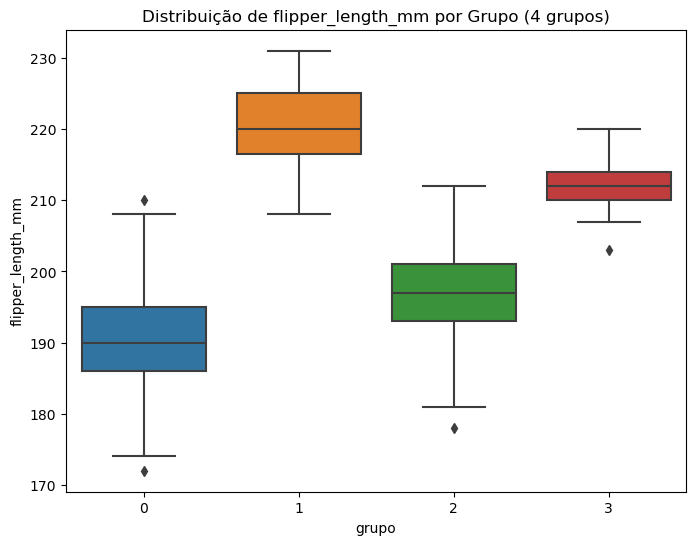

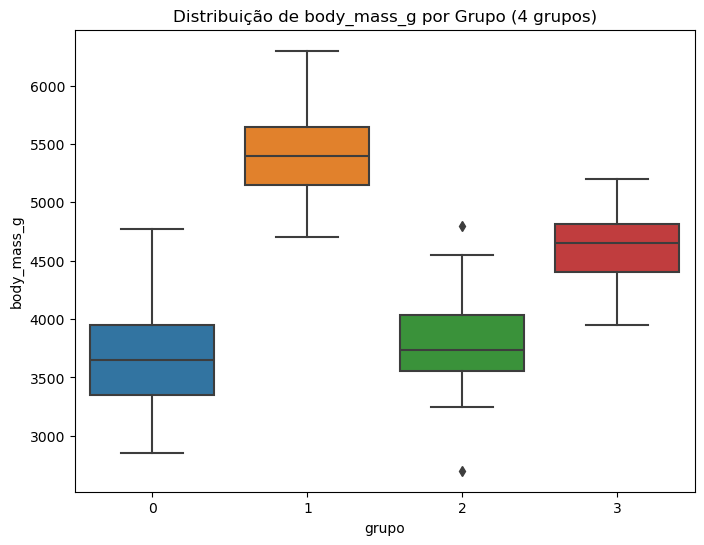

In [16]:
for var in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='grupo', y=var, data=peng_agrupado4)
    plt.title(f'Distribuição de {var} por Grupo (4 grupos)')
    plt.show()


## As espécies de pinguins tendem a se distribuir em regiões diferentes quando analisamos suas características físicas, principalmente o comprimento das nadadeiras e o peso.

## A espécie Adelie, por exemplo, geralmente aparece em um grupo separado, já que esses pinguins costumam ter bicos menores e são mais leves.